In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_path = "/content/drive/MyDrive/Car-Bike-Dataset"
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_datagen = datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary',subset='training')
val_datagen = datagen.flow_from_directory(train_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode="binary",subset='validation')


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential([
   Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
   MaxPooling2D(2,2),
   Conv2D(128,(3,3),activation="relu"),
   MaxPooling2D(2,2),
   Conv2D(64,(3,3),activation="relu"),
   MaxPooling2D(2,2),
   Flatten(),
   Dense(128,activation="relu"),
   Dense(1,activation="sigmoid"),

])

model.compile(optimizer='adam',
               loss="binary_crossentropy",
              metrics=['accuracy'])
history=model.fit(train_datagen,epochs=5,validation_data=val_datagen)
loss,acc=model.evaluate(val_datagen)
print(acc)
print(loss)
model.save("saved_model/my_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 23/100 ━━━━━━━━━━━━━━━━━━━━ 5:12 4s/step - accuracy: 0.5890 - loss: 1.1538

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.6980 - loss: 0.7190 - val_accuracy: 0.8725 - val_loss: 0.3137
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 437s 4s/step - accuracy: 0.9169 - loss: 0.2158 - val_accuracy: 0.9150 - val_loss: 0.2223
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 437s 4s/step - accuracy: 0.9556 - loss: 0.1205 - val_accuracy: 0.9175 - val_loss: 0.2283
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 436s 4s/step - accuracy: 0.9769 - loss: 0.0674 - val_accuracy: 0.9125 - val_loss: 0.2517
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.9902 - loss: 0.0283 - val_accuracy: 0.9312 - val_loss: 0.2805
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9334 - loss: 0.2890


0.9312499761581421
0.2805386483669281


In [ ]:
train_datagen.class_indices

{'Bike': 0, 'Car': 1}

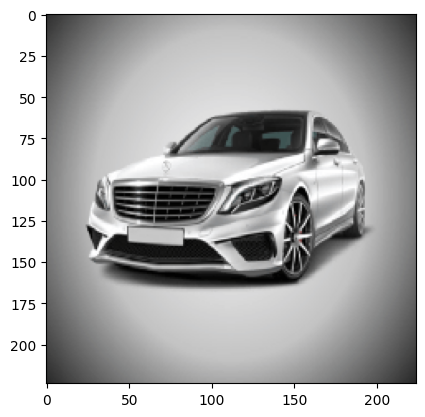

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Prediction: Car 


In [ ]:
img = image.load_img("/content/drive/MyDrive/prediction imgs/Car for prediction.png", target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.imshow(img_array[0])
plt.show()
prediction = model.predict(img_array)[0][0]
if prediction < 0.5:
    print("Prediction: Bike ")
else:
    print("Prediction: Car ")

